<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Zadanie**

1. Wczytaj dane Churn_modeling
2. Objerzyj dane
3. Przygotuj dane do przetwarzania
4. Przygotuj sieć neuronową, która dokonuje predykcji czy dany klient opuści bank
5. Dokonaj ewaluacji modelu

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def Show_history(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="Training accuracy")
  plt.plot(epochs_range, val_acc, label="Validation accuracy")
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="Training loss")
  plt.plot(epochs_range, val_loss, label="Validation loss")
  plt.legend(loc="upper right")
  plt.title("Training and validation losses")
  plt.show()

In [ ]:
dataset = pd.read_csv('churn_modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9998.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.526905,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.662278,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9998 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname']) #usuwanie kolumn
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset['Gender']= dataset['Gender'].astype('category') #zmiana rodzaju danych na category
dataset['Geography']= dataset['Geography'].astype('category')

In [ ]:
dataset.isnull().sum()

,0
CreditScore,2
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
print(len(dataset))
dataset = dataset.dropna()
print(len(dataset))

10000
9998


In [ ]:
dataset_x=dataset.drop(columns='Exited') #podział na x i y
dataset_y=dataset['Exited']

In [ ]:
dataset_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
#zakodowanie zmiennych kategorycznych
dataset_x['Gender'].value_counts()

,count
Gender,
Male,5456
Female,4542


In [ ]:
dataset_x['Geography'].value_counts()

,count
Geography,
France,5013
Germany,2509
Spain,2476


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset_x['Gender'] = dataset_x['Gender'].cat.codes

In [ ]:
geography_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
col_trans = ColumnTransformer([(
    'geography_nencoder', geography_transformer, ['Geography'])
], remainder='passthrough')

In [ ]:
X = col_trans.fit_transform(dataset_x)

In [ ]:
X[0]

array([     1.  ,      0.  ,      0.  ,    619.  ,      0.  ,     42.  ,
            2.  ,      0.  ,      1.  ,      1.  ,      1.  , 101348.88])

In [ ]:
np.set_printoptions(precision=2, suppress=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, dataset_y, test_size=0.2)

In [ ]:
x_test.shape

(2000, 12)

In [ ]:
x_test[:5]

array([[     1.  ,      0.  ,      0.  ,    818.  ,      0.  ,     31.  ,
             1.  , 186796.37,      1.  ,      0.  ,      0.  , 178252.63],
       [     1.  ,      0.  ,      0.  ,    672.  ,      1.  ,     39.  ,
             2.  ,      0.  ,      2.  ,      1.  ,      0.  ,  87372.49],
       [     1.  ,      0.  ,      0.  ,    494.  ,      0.  ,     35.  ,
             9.  , 112727.06,      2.  ,      1.  ,      0.  , 183752.91],
       [     1.  ,      0.  ,      0.  ,    757.  ,      1.  ,     32.  ,
             9.  ,      0.  ,      2.  ,      1.  ,      0.  , 115950.96],
       [     1.  ,      0.  ,      0.  ,    717.  ,      1.  ,     53.  ,
             6.  ,      0.  ,      2.  ,      0.  ,      1.  ,  97614.87]])

In [ ]:
y_test.shape

(2000,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_test[:5]

array([[ 1.  , -0.58, -0.58,  1.73, -1.1 , -0.75, -1.4 ,  1.76, -0.91,
        -1.54, -1.03,  1.36],
       [ 1.  , -0.58, -0.58,  0.22,  0.91,  0.01, -1.05, -1.23,  0.81,
         0.65, -1.03, -0.22],
       [ 1.  , -0.58, -0.58, -1.62, -1.1 , -0.37,  1.38,  0.58,  0.81,
         0.65, -1.03,  1.46],
       [ 1.  , -0.58, -0.58,  1.1 ,  0.91, -0.66,  1.38, -1.23,  0.81,
         0.65, -1.03,  0.28],
       [ 1.  , -0.58, -0.58,  0.68,  0.91,  1.35,  0.33, -1.23,  0.81,
        -1.54,  0.97, -0.04]])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(12,)))


model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5458 - loss: 0.7032 - val_accuracy: 0.7925 - val_loss: 0.4696
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4611 - val_accuracy: 0.7965 - val_loss: 0.4426
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4388 - val_accuracy: 0.8145 - val_loss: 0.4268
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 0.4181 - val_accuracy: 0.8245 - val_loss: 0.4119
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8369 - loss: 0.3993 - val_accuracy: 0.8370 - val_loss: 0.3922
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3786 - val_accuracy: 0.8405 - val_loss: 0.3817
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.3818 - val_accuracy: 0.8425 - val_loss: 0.3763
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3725 - val_accuracy: 

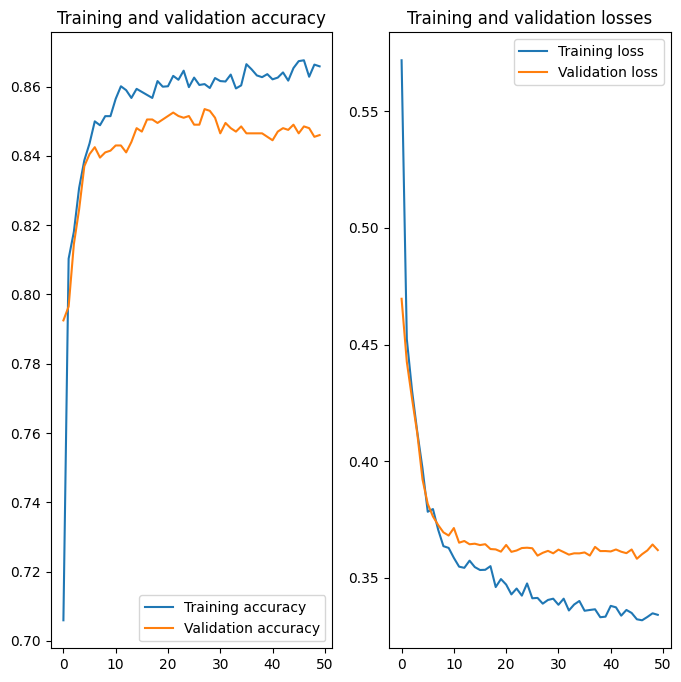

In [ ]:
Show_history(history, 50)

In [ ]:
y_test_predictions = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
y_test_predictions = (y_test_predictions > 0.5).astype(int)

In [ ]:
y_test_predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
true_vs_pred = pd.DataFrame(
    {
        'y_test': y_test,
        'y_pred': y_test_predictions.reshape(-1)
    }

)

In [ ]:
true_vs_pred

,y_test,y_pred
841,0,0
5301,0,0
9142,0,0
4746,0,0
863,0,0
...,...,...
9629,0,0
8900,0,0
8196,0,0
5740,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_test_predictions)
accuracy = accuracy_score(y_test, y_test_predictions)
class_report = classification_report(y_test, y_test_predictions)


print(cm)


print(accuracy)


print(class_report)

[[1533   49]
 [ 259  159]]
0.846
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1582
           1       0.76      0.38      0.51       418

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.84      0.85      0.82      2000



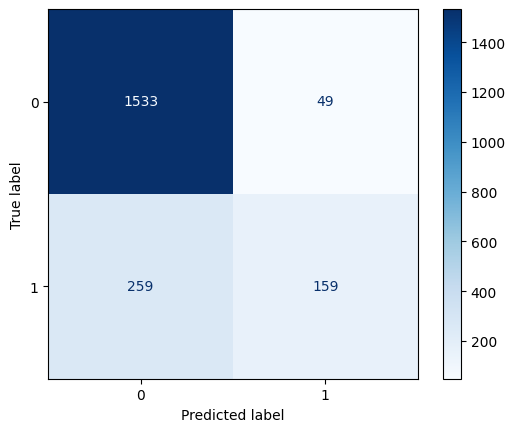

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predictions, display_labels=['0', '1']
                                                     , cmap='Blues')

plt.show()